In [2]:
# Task 1: Frequency Table of class variable
import seaborn as sns
import pandas as pd
df = sns.load_dataset("titanic")
freq_table = df['class'].value_counts().reset_index()
freq_table.columns = ['Class', 'Absolute Frequency']
freq_table['Relative Frequency (%)'] = (freq_table['Absolute Frequency'] / len(df) * 100).round(2)
freq_table['Cumulative Frequency'] = freq_table['Absolute Frequency'].cumsum()
freq_table


,Class,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
0,Third,491,55.11,491
1,First,216,24.24,707
2,Second,184,20.65,891


In [3]:
# Task 2: Two-way contingency table (sex vs survived)
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)
contingency_table


survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [4]:

total = len(df)
joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / total
marginal_female = len(df[df['sex'] == 'female']) / total
marginal_survived = len(df[df['survived'] == 1]) / total

cond_survived_given_female = joint_prob / marginal_female
cond_female_given_survived = joint_prob / marginal_survived

{
    "Joint P(Female, Survived=1)": joint_prob,
    "Marginal P(Female)": marginal_female,
    "Marginal P(Survived=1)": marginal_survived,
    "Conditional P(Survived=1 | Female)": cond_survived_given_female,
    "Conditional P(Female | Survived=1)": cond_female_given_survived
}


{'Joint P(Female, Survived=1)': 0.2615039281705948,
 'Marginal P(Female)': 0.35241301907968575,
 'Marginal P(Survived=1)': 0.3838383838383838,
 'Conditional P(Survived=1 | Female)': 0.7420382165605095,
 'Conditional P(Female | Survived=1)': 0.6812865497076023}

Correlation between Age and Fare: 0.0960666917690389


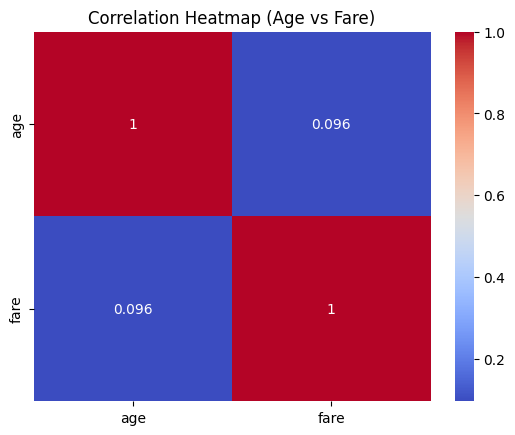

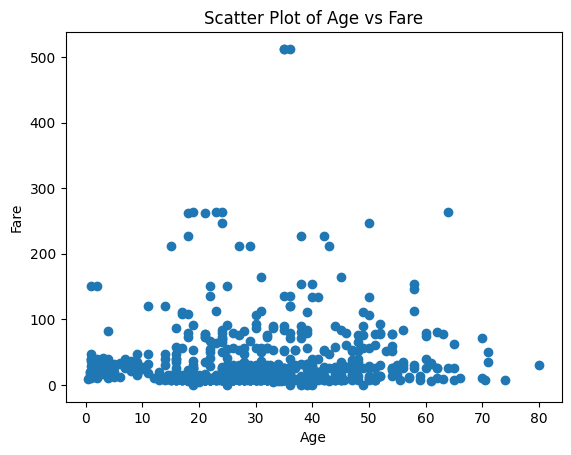

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data
df_clean = df[['age', 'fare']].dropna()

# Calculate correlation
correlation = df_clean['age'].corr(df_clean['fare'])
print("Correlation between Age and Fare:", correlation)

# Heatmap
sns.heatmap(df_clean.corr(method="pearson"), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Age vs Fare)")
plt.show()

# Scatter plot
plt.scatter(df_clean['age'], df_clean['fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.show()


#TASK 5 interpretation
#q1
The Pearson correlation coefficient shows the strength and direction of the relationship between age and fare.

If close to 0, the relationship is weak.

Positive means older passengers tended to pay more.

Negative means older passengers tended to pay less.




#q2
The correlation coefficient you computed will guide the interpretation:

A positive value means as age increases, fare tends to increase slightly.

A negative value would mean as age increases, fare decreases.

Since Titanic fares depended more on passenger class than age, the correlation is expected to be weak